In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv("/content/TravelInsurancePrediction.csv")
d.isnull()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1982,False,False,False,False,False,False,False,False,False,False
1983,False,False,False,False,False,False,False,False,False,False
1984,False,False,False,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False,False,False,False


Fetching the first 5 rows of the dataset


In [ ]:
d.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Fetching the final 5 rows of the dataset

In [ ]:
d.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0



Information fetching

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB



Statistical information about the dataset

In [ ]:
d.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000



Checking the existace of nullvalue

In [ ]:
d.isnull()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1982,False,False,False,False,False,False,False,False,False,False
1983,False,False,False,False,False,False,False,False,False,False
1984,False,False,False,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False,False,False,False


checking datatype of each feature


In [ ]:
d.dtypes

,0
Unnamed: 0,int64
Age,int64
Employment Type,object
GraduateOrNot,object
AnnualIncome,int64
FamilyMembers,int64
ChronicDiseases,int64
FrequentFlyer,object
EverTravelledAbroad,object
TravelInsurance,int64


 rows and column in the dataset


In [ ]:
d.shape

(1987, 10)

In [ ]:
d

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
d=pd.get_dummies(d, columns=['Employment Type', 'GraduateOrNot', 'FrequentFlyer','EverTravelledAbroad'],drop_first=True)


correclation

                                              Unnamed: 0       Age  \
Unnamed: 0                                      1.000000 -0.004917   
Age                                            -0.004917  1.000000   
AnnualIncome                                   -0.025031 -0.020101   
FamilyMembers                                  -0.041506  0.027409   
ChronicDiseases                                -0.006858  0.007359   
TravelInsurance                                 0.006196  0.061060   
Employment Type_Private Sector/Self Employed   -0.015769 -0.115134   
GraduateOrNot_Yes                              -0.008602  0.027125   
FrequentFlyer_Yes                              -0.004596 -0.033159   
EverTravelledAbroad_Yes                        -0.002160 -0.012779   

                                              AnnualIncome  FamilyMembers  \
Unnamed: 0                                       -0.025031      -0.041506   
Age                                              -0.020101       0.027409  

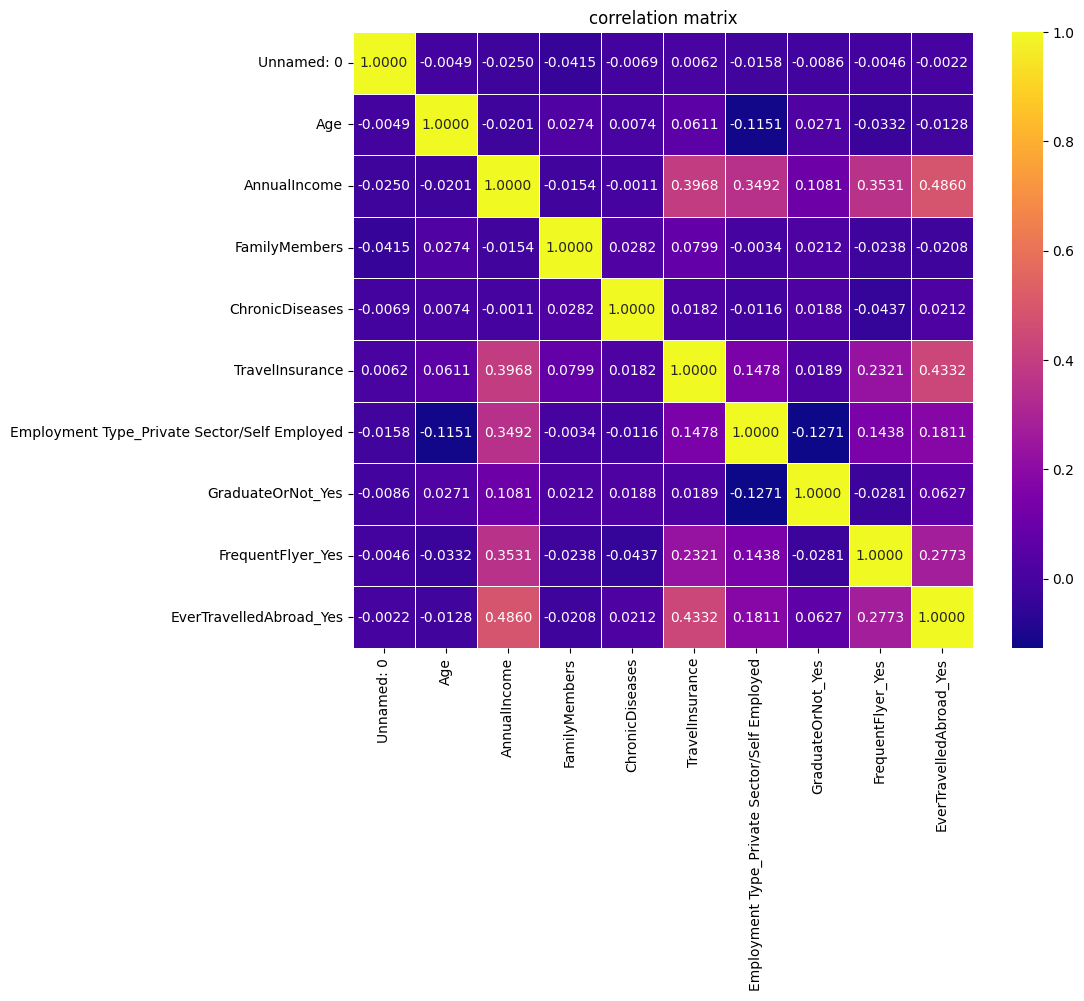

In [ ]:
correlation_matrix = d.corr()
print(correlation_matrix)

plt.figure(figsize =(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='plasma', fmt=".4f", linewidths = 0.7)
plt.title("correlation matrix")
plt.show()

displot

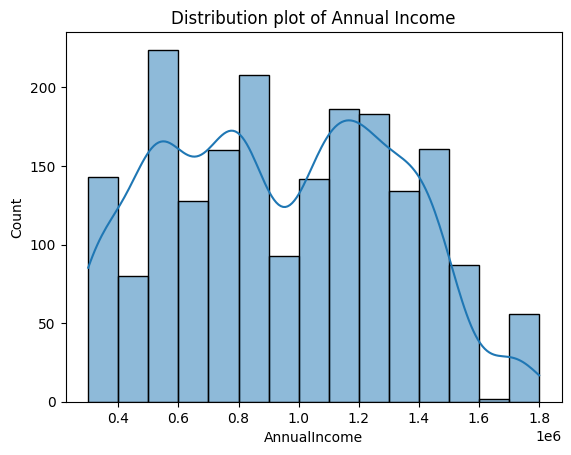

In [ ]:
sns.histplot(d.AnnualIncome, kde=True)
plt.title("Distribution plot of Annual Income")
plt.show()




 split the data and train the model by using the decision tree classification algoritm.




In [ ]:
from sklearn.model_selection import train_test_split


df=d.rename(columns={'Employment Type':'EmploymentType'})
x=df.drop(['TravelInsurance'],axis=1)
y=df.TravelInsurance
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
# model.fit(x_train,y_train)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model_tree=DecisionTreeClassifier()
model_tree.fit(x_test,y_test)

DecisionTreeClassifier()

In [ ]:
h = DecisionTreeClassifier()

h.fit(x_train, y_train)

i = h.predict(x_test)
print(i)
l=accuracy_score(y_test,i)
print(l)

[0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0]
0.7412060301507538


Knearest Neighbour


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier()

n.fit(x_train,y_train)
d= n.predict(x_test)
print(d)
f = accuracy_score(y_test,d)
print(f)


[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1]
0.7613065326633166


#Doing Hyperparameter Tuning as Grid_Search for KNeighborsClassifier

In [ ]:
parameters2 = {
              'n_neighbors': [1, 3, 5],
              'weights': ['uniform', 'distance']

}
classifier2 = GridSearchCV(n, parameters2, cv=5)
classifier2.fit(x, y)
classifier2.cv_results_

{'mean_fit_time': array([0.00809317, 0.00704174, 0.00554953, 0.0052659 , 0.00578899,
        0.00535355]),
 'std_fit_time': array([0.00473326, 0.00249907, 0.00032914, 0.00029228, 0.00081015,
        0.00021178]),
 'mean_score_time': array([0.03181739, 0.00744123, 0.0288064 , 0.00590463, 0.02932186,
        0.00590563]),
 'std_score_time': array([0.00611288, 0.00196081, 0.00190101, 0.00037818, 0.00323121,
        0.00012313]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1, 'weights': 'uniform'},
  {'n_neighbors': 1, 'weights': 'distance'},
  {'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neig

In [ ]:
#best parameters
best_parameters2 = classifier2.best_params_
print(best_parameters2)

{'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
#highest accuracy
highest_accuracy2 = classifier2.best_score_
print(highest_accuracy2)

0.7276989481412098


In [ ]:
#loding the results to pandas dataframe
result2 = pd.DataFrame(classifier2.cv_results_)
result2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008093,0.004733,0.031817,0.006113,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.695980,0.748744,0.644836,0.614610,0.748111,0.690456,0.054011,5
1,0.007042,0.002499,0.007441,0.001961,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.695980,0.748744,0.644836,0.614610,0.748111,0.690456,0.054011,5
2,0.005550,0.000329,0.028806,0.001901,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.711055,0.761307,0.685139,0.662469,0.790932,0.722180,0.047579,2
3,0.005266,0.000292,0.005905,0.000378,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.713568,0.763819,0.664987,0.627204,0.793451,0.712606,0.061189,4
4,0.005789,0.000810,0.029322,0.003231,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.753769,0.763819,0.667506,0.685139,0.768262,0.727699,0.042577,1


#Doing Hyperparameter Tuning as Grid_Search for DecisionTree

In [ ]:
parameters3 = {
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15]
}

In [ ]:
classifier3 = GridSearchCV(h, parameters3, cv=5)
classifier3.fit(x, y)
classifier3.cv_results_

{'mean_fit_time': array([0.01416664, 0.01260929, 0.0089613 , 0.00965276, 0.01239338,
        0.00703397, 0.00934796, 0.01133847]),
 'std_fit_time': array([0.00186671, 0.0059376 , 0.00047797, 0.00021933, 0.00025856,
        0.00016526, 0.00028229, 0.0005514 ]),
 'mean_score_time': array([0.00536056, 0.00504947, 0.003092  , 0.00321617, 0.00350204,
        0.00292611, 0.00334067, 0.00335617]),
 'std_score_time': array([1.21921536e-03, 6.61070826e-04, 9.45215140e-05, 6.01232096e-05,
        2.01147785e-04, 1.52967250e-04, 1.86666272e-04, 1.21211630e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, 5, 10, 15, None, 5, 10, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
  

In [ ]:
#best parameters
best_parameters3 = classifier3.best_params_
print(best_parameters3)

{'criterion': 'entropy', 'max_depth': 5}


In [ ]:
#highest accuracy
highest_accuracy3 = classifier3.best_score_
print(highest_accuracy3)

0.8329114084275281


In [ ]:
#loding the results to pandas dataframe
result3 = pd.DataFrame(classifier3.cv_results_)
result3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014167,0.001867,0.005361,0.001219,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.781407,0.773869,0.624685,0.493703,0.798489,0.694431,0.118203,7
1,0.012609,0.005938,0.005049,0.000661,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.814070,0.851759,0.846348,0.831234,0.816121,0.831906,0.015300,2
2,0.008961,0.000478,0.003092,0.000095,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.814070,0.816583,0.649874,0.498741,0.798489,0.715551,0.124990,4
3,0.009653,0.000219,0.003216,0.000060,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.773869,0.809045,0.622166,0.471033,0.801008,0.695424,0.131095,6
4,0.012393,0.000259,0.003502,0.000201,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.796482,0.703518,0.609572,0.508816,0.801008,0.683879,0.112208,8


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
rf = RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Accessing cross-validation results for Random Forest classifier
rf_cv_results = classifier3.cv_results_

# Print the cross-validation results
print("Random Forest Cross Validation Results:")
print(rf_cv_results)



Random Forest Cross Validation Results:
{'mean_fit_time': array([0.01416664, 0.01260929, 0.0089613 , 0.00965276, 0.01239338,
       0.00703397, 0.00934796, 0.01133847]), 'std_fit_time': array([0.00186671, 0.0059376 , 0.00047797, 0.00021933, 0.00025856,
       0.00016526, 0.00028229, 0.0005514 ]), 'mean_score_time': array([0.00536056, 0.00504947, 0.003092  , 0.00321617, 0.00350204,
       0.00292611, 0.00334067, 0.00335617]), 'std_score_time': array([1.21921536e-03, 6.61070826e-04, 9.45215140e-05, 6.01232096e-05,
       2.01147785e-04, 1.52967250e-04, 1.86666272e-04, 1.21211630e-04]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy', 'entropy'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[None, 5, 10, 15, None, 5, 10, 15],
             mask=[False, False, False, False, False, False, False, False],


In [ ]:
# Best parameters for Random Forest
best_parameters_rf = classifier3.best_params_
print("Best Parameters for Random Forest:", best_parameters_rf)


Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 5}


In [ ]:
# Highest accuracy achieved during cross-validation for Random Forest
highest_accuracy_rf = classifier3.best_score_
print("Highest Accuracy for Random Forest:", highest_accuracy_rf)


Highest Accuracy for Random Forest: 0.8329114084275281


In [ ]:
import pandas as pd

# Loading the results into a pandas DataFrame
result_df_rf = pd.DataFrame(classifier3.cv_results_)

# Displaying the first few rows of the DataFrame
print(result_df_rf.head())


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.014167      0.001867         0.005361        0.001219   
1       0.012609      0.005938         0.005049        0.000661   
2       0.008961      0.000478         0.003092        0.000095   
3       0.009653      0.000219         0.003216        0.000060   
4       0.012393      0.000259         0.003502        0.000201   

  param_criterion param_max_depth  \
0            gini            None   
1            gini               5   
2            gini              10   
3            gini              15   
4         entropy            None   

                                        params  split0_test_score  \
0     {'criterion': 'gini', 'max_depth': None}           0.781407   
1        {'criterion': 'gini', 'max_depth': 5}           0.814070   
2       {'criterion': 'gini', 'max_depth': 10}           0.814070   
3       {'criterion': 'gini', 'max_depth': 15}           0.773869   
4  {'criterion': 'entropy', '

In [69]:
import pandas as pd

# Path to the CSV file (ensure this path points to where the file is located)
csv_path = '/content/TravelInsurancePrediction.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# (Optional) Save the DataFrame to a new CSV file if you want to process and save it
output_csv_path = 'processed_travel_predictions.csv'
df.to_csv(output_csv_path, index=False)

print(f"\nData saved to '{output_csv_path}'")


First few rows of the DataFrame:
   Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                

In [71]:
# Get some basic statistics
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

# Analyze the distribution of a specific column
print(df['TravelInsurance'].value_counts())


        Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  
Unnamed: 0             0
Age                 